In [24]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box, Polygon
from shapely.ops import orient
from pyproj import Geod
from maplot import *

china_path = "H:\\Region\\全国shp\\最新2021年全国行政区划\\省.shp"
china_shp = gpd.read_file(china_path)
china = np.load("./seven_parts.npy") >=0

In [2]:
china_shp

,省,省代码,省类型,Area1,geometry
0,安徽省,340000,省,1.401615e+11,"POLYGON ((116.42633 34.64000, 116.42607 34.638..."
1,澳门特别行政区,820000,特别行政区,5.278519e+07,"MULTIPOLYGON (((113.58117 22.19779, 113.57895 ..."
2,北京市,110000,直辖市,1.640645e+10,"POLYGON ((116.62585 41.05887, 116.62638 41.058..."
3,福建省,350000,省,1.248598e+11,"MULTIPOLYGON (((117.68877 23.53144, 117.68752 ..."
4,甘肃省,620000,省,4.255110e+11,"MULTIPOLYGON (((106.07129 35.44955, 106.07072 ..."
5,广东省,440000,省,1.816407e+11,"MULTIPOLYGON (((110.56038 20.32783, 110.55647 ..."
6,广西壮族自治区,450000,自治区,2.374909e+11,"MULTIPOLYGON (((109.21436 20.90184, 109.21081 ..."
7,贵州省,520000,省,1.760721e+11,"MULTIPOLYGON (((105.09467 24.92520, 105.09458 ..."
8,海南省,460000,省,4.356792e+10,"MULTIPOLYGON (((112.04826 3.83733, 112.01807 3..."
9,河北省,130000,省,1.885245e+11,"MULTIPOLYGON (((118.27154 38.98200, 118.27068 ..."


In [19]:
geod = Geod(ellps="WGS84")
geod.geometry_area_perimeter(box(0., 0., 1., 1.))

areaRaster = np.zeros((180, 360))
for lat in range(-90, 90):
    areaRaster[lat+90, :] = geod.geometry_area_perimeter(box(0., lat, 1., lat+1.))[0]

In [21]:
areaRaster.sum()  # 平方米

510065621724088.56

In [22]:
transRaster = 365 * 1e-6 * areaRaster  # gC/m2/day 转 tC/year

In [23]:
transRaster.shape

(180, 360)

In [25]:
for lat in range(180):
    for lon in range(360):
        if not china[lat, lon]:
            transRaster[lat, lon] *= 0.0
            continue
        bbox_polygon = box(lon - 180., lat - 90., lon - 179., lat - 89.)
        bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs=china_shp.crs)
        clipped_gdf = gpd.clip(china_shp, bbox_gdf)
        clipped_gdf['area'] = clipped_gdf.geometry.area

        transRaster[lat, lon] *= clipped_gdf['area'].sum()

C:\Users\alzio\AppData\Local\Temp\ipykernel_20540\121739573.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped_gdf['area'] = clipped_gdf.geometry.area
C:\Users\alzio\AppData\Local\Temp\ipykernel_20540\121739573.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped_gdf['area'] = clipped_gdf.geometry.area
C:\Users\alzio\AppData\Local\Temp\ipykernel_20540\121739573.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped_gdf['area'] = clipped_gdf.geometry.area
C:\Users\alzio\AppData\Local\Temp\ipykernel_20540\121739573.py:9: UserWarning: Geometry is in a geographic CR

H:\preprocessing_code\Region\China\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


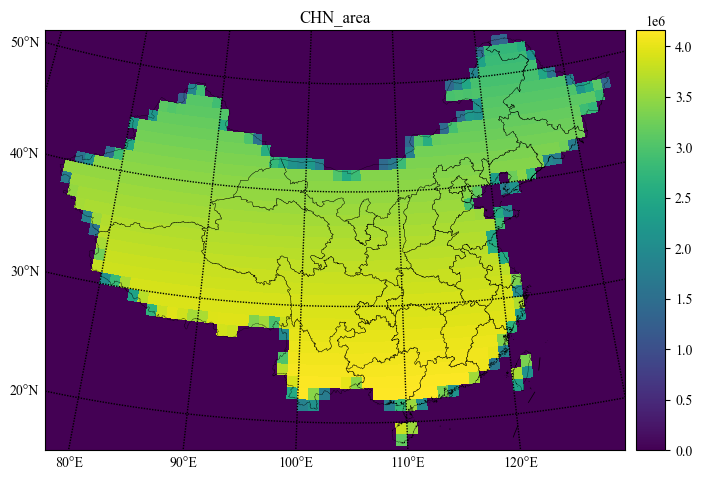

In [26]:
map_plot_surface(transRaster, "viridis", None, None, "CHN_area", figsize=(8, 8))

In [27]:
(transRaster > 0.0).sum()

983

In [28]:
np.save("china_area.npy", transRaster)  # 单位：365km^2